<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-3/Problem_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation Metrics
Accuracy:  0.9737
Precision: 0.9859
Recall:    0.9722
F1 Score:  0.9790

Confusion Matrix Values:
True Negatives (TN): 41
False Positives (FP): 1
False Negatives (FN): 2
True Positives (TP): 70

Final Training Loss: 0.0461
Final Validation Loss: 0.0757
Final Training Accuracy: 0.9890
Final Validation Accuracy: 0.9737


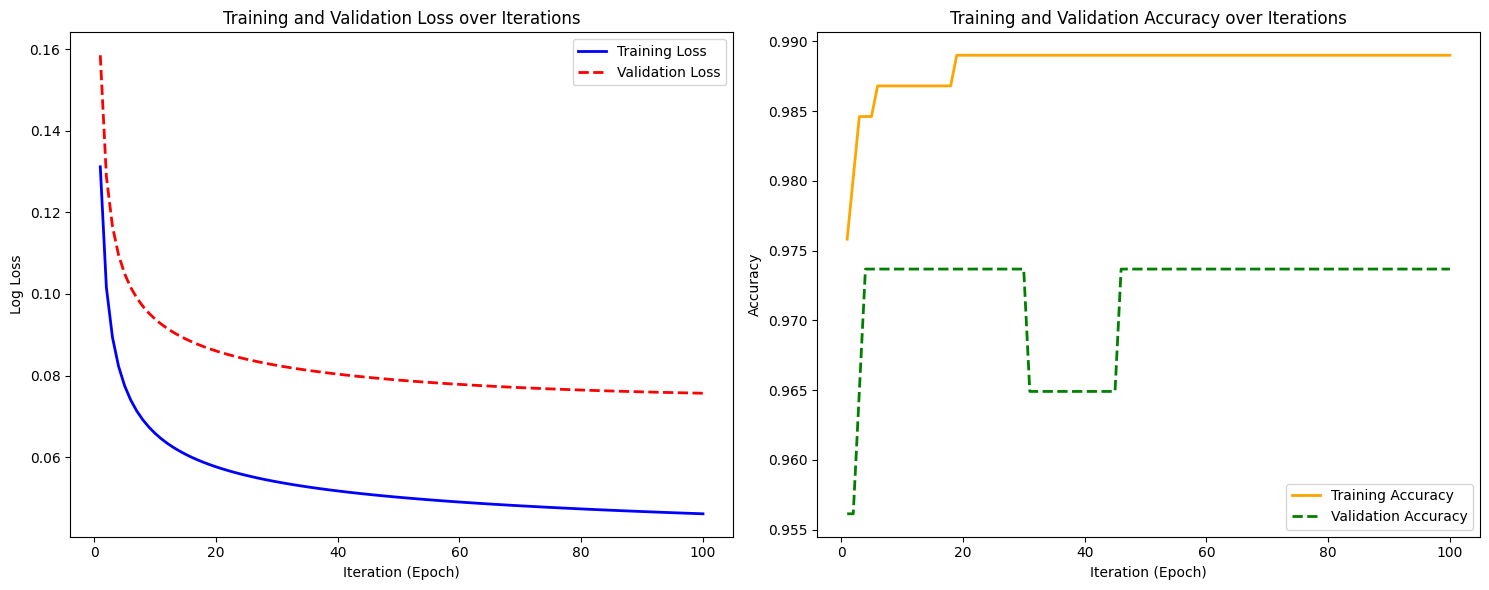

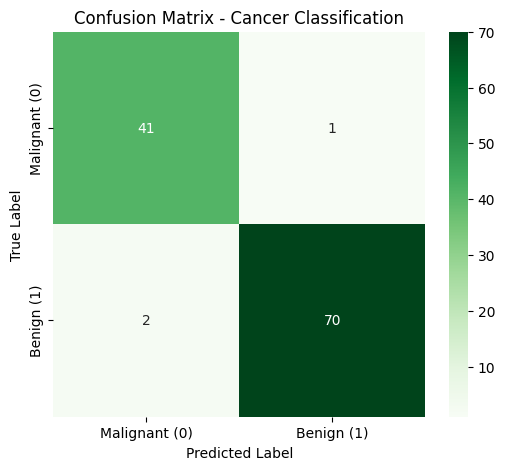

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

# For this homework, we're using cancer dataset which can be directly called from sklearn library
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

# I've separated input features and target.
X_in = df_cancer.drop('target', axis=1)
y_out = df_cancer['target']

# I've splited the data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_in, y_out, test_size=0.2, random_state=42, stratify=y_out)

# Standardization
scaler_cancer = StandardScaler()
X_train_scaled_cancer = scaler_cancer.fit_transform(X_train_cancer)
X_test_scaled_cancer = scaler_cancer.transform(X_test_cancer)

# Logistic Regression Classifier (SGD)
N_Iterations = 100
sgd_clf_cancer = SGDClassifier(
    loss='log_loss',
    max_iter=1,
    tol=None,
    random_state=42,
    warm_start=True,
    learning_rate='constant',
    eta0=0.01
)

train_losses_cancer = []
train_accuracies_cancer = []
val_losses_cancer = []
val_accuracies_cancer = []

for epoch in range(1, N_Iterations + 1):

    sgd_clf_cancer.partial_fit(X_train_scaled_cancer, y_train_cancer, classes=np.unique(y_out))

    # Training loss and accuracy
    y_train_pred_proba_cancer = sgd_clf_cancer.predict_proba(X_train_scaled_cancer)
    train_loss_cancer = log_loss(y_train_cancer, y_train_pred_proba_cancer)
    train_losses_cancer.append(train_loss_cancer)

    y_train_pred_iter_cancer = sgd_clf_cancer.predict(X_train_scaled_cancer)
    train_accuracy_cancer = accuracy_score(y_train_cancer, y_train_pred_iter_cancer)
    train_accuracies_cancer.append(train_accuracy_cancer)

    # Validation loss and accuracy (using test set as validation)
    y_val_pred_proba_cancer = sgd_clf_cancer.predict_proba(X_test_scaled_cancer)
    val_loss_cancer = log_loss(y_test_cancer, y_val_pred_proba_cancer)
    val_losses_cancer.append(val_loss_cancer)

    y_val_pred_iter_cancer = sgd_clf_cancer.predict(X_test_scaled_cancer)
    val_accuracy_cancer = accuracy_score(y_test_cancer, y_val_pred_iter_cancer)
    val_accuracies_cancer.append(val_accuracy_cancer)

# Final prediction
y_pred_cancer = sgd_clf_cancer.predict(X_test_scaled_cancer)

# Results
accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
precision_cancer = precision_score(y_test_cancer, y_pred_cancer)
recall_cancer = recall_score(y_test_cancer, y_pred_cancer)
f1_cancer = f1_score(y_test_cancer, y_pred_cancer)
cm_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)

print("Evaluation Metrics")
print(f"Accuracy:  {accuracy_cancer:.4f}")
print(f"Precision: {precision_cancer:.4f}")
print(f"Recall:    {recall_cancer:.4f}")
print(f"F1 Score:  {f1_cancer:.4f}")

# Confusion matrix values
print("\nConfusion Matrix Values:")
print(f"True Negatives (TN): {cm_cancer[0, 0]}")
print(f"False Positives (FP): {cm_cancer[0, 1]}")
print(f"False Negatives (FN): {cm_cancer[1, 0]}")
print(f"True Positives (TP): {cm_cancer[1, 1]}")

# Print final training and validation metrics
print(f"\nFinal Training Loss: {train_losses_cancer[-1]:.4f}")
print(f"Final Validation Loss: {val_losses_cancer[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies_cancer[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies_cancer[-1]:.4f}")

# 7. Plotting Training and Validation Results over iterations
plt.figure(figsize=(15, 6))

# Loss over iterations
plt.subplot(1, 2, 1)
plt.plot(range(1, N_Iterations + 1), train_losses_cancer, label='Training Loss', color='blue', linewidth=2)
plt.plot(range(1, N_Iterations + 1), val_losses_cancer, label='Validation Loss', color='red', linewidth=2, linestyle='--')
plt.title('Training and Validation Loss over Iterations')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Log Loss')
plt.legend()

# Accuracy over iterations
plt.subplot(1, 2, 2)
plt.plot(range(1, N_Iterations + 1), train_accuracies_cancer, label='Training Accuracy', color='orange', linewidth=2)
plt.plot(range(1, N_Iterations + 1), val_accuracies_cancer, label='Validation Accuracy', color='green', linewidth=2, linestyle='--')
plt.title('Training and Validation Accuracy over Iterations')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.title('Confusion Matrix - Cancer Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()